In [1]:
# import

In [2]:
import numpy as np
from qiskit import *
from qiskit import Aer
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options

In [3]:
# création d'un circuit de 8 qbits

In [4]:
circ = QuantumCircuit(8)

In [5]:
# on place une porte hadamard sur les 4 premier qubits

In [6]:
circ.h(0)
circ.h(1)
circ.h(2)
circ.h(3)

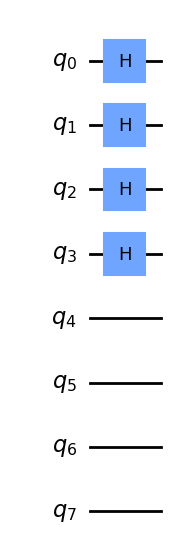

In [7]:
circ.draw('mpl',style='clifford')

In [8]:
circ.barrier()

In [9]:
# observation si les valeurs des qubits de 1 à 4 on une valeur "1" pair ou umpair et la valeur de cette observation 
#est stoké dans la valeur du qbits 4

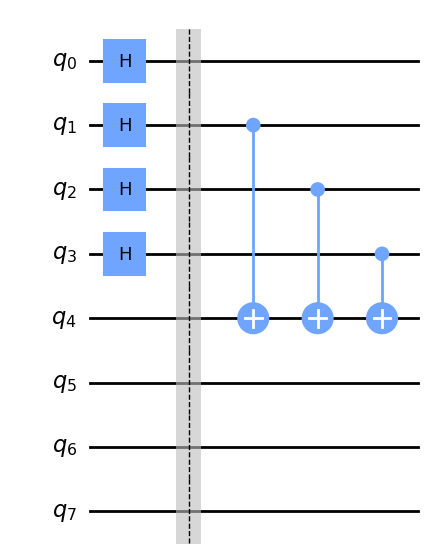

In [10]:
circ.cx(1,4)
circ.cx(2,4)
circ.cx(3,4)

circ.draw('mpl',style='clifford')

In [11]:
circ.barrier()

In [12]:
# prise en compte de la valeur obsersé dans les qbits représentant les décision (5-7)

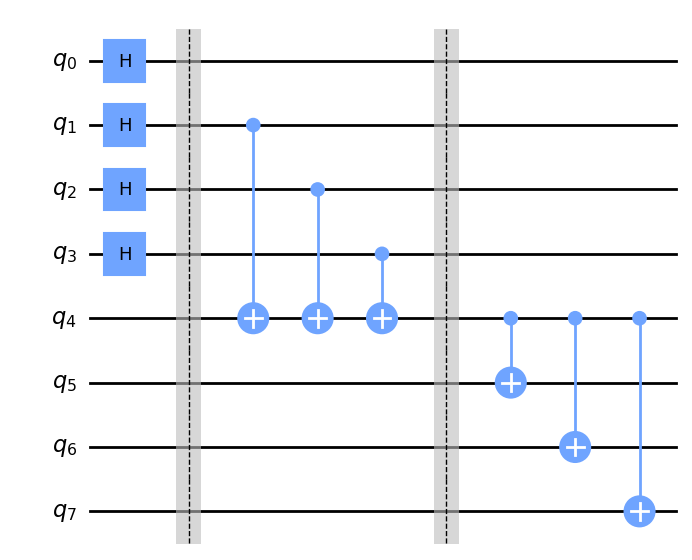

In [13]:
circ.cx(4,5)
circ.cx(4,6)
circ.cx(4,7)

circ.draw('mpl',style='clifford')

In [14]:
circ.barrier()

In [15]:
#observation des valeurs "1" des qubits se trouvant devant le qubits 1 

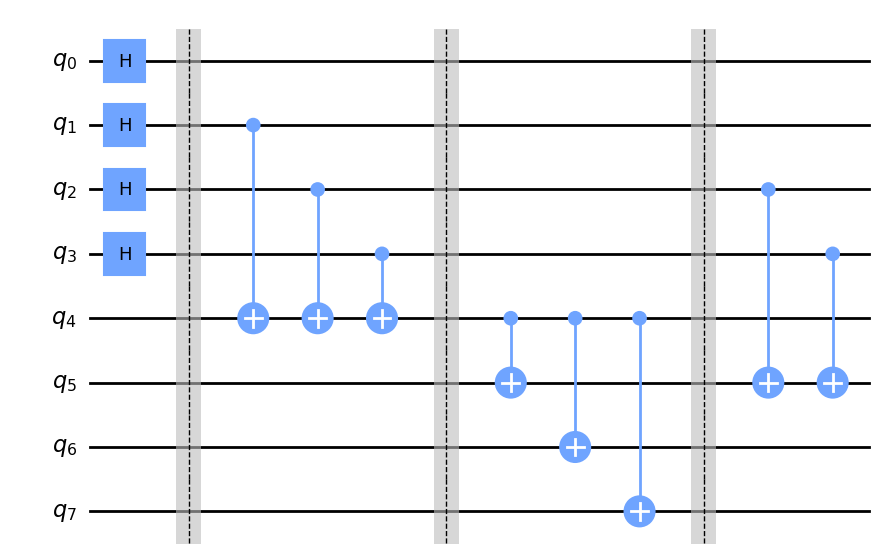

In [16]:
circ.cx(2,5)
circ.cx(3,5)

circ.draw('mpl',style='clifford')

In [17]:
circ.barrier()

In [18]:
#prise en compte de cette observation dans les deux denier qbits de décisions (6-7)

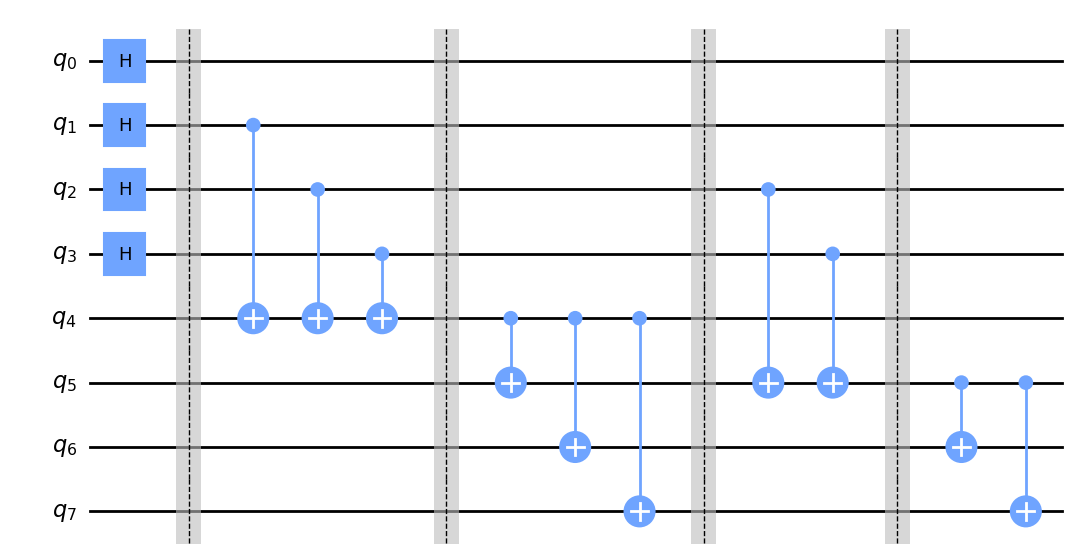

In [19]:
circ.cx(5,6)
circ.cx(5,7)

circ.draw('mpl',style='clifford')

In [20]:
circ.barrier()

In [21]:
#obvervation du qbits en face et stokage dans le qbits de décision

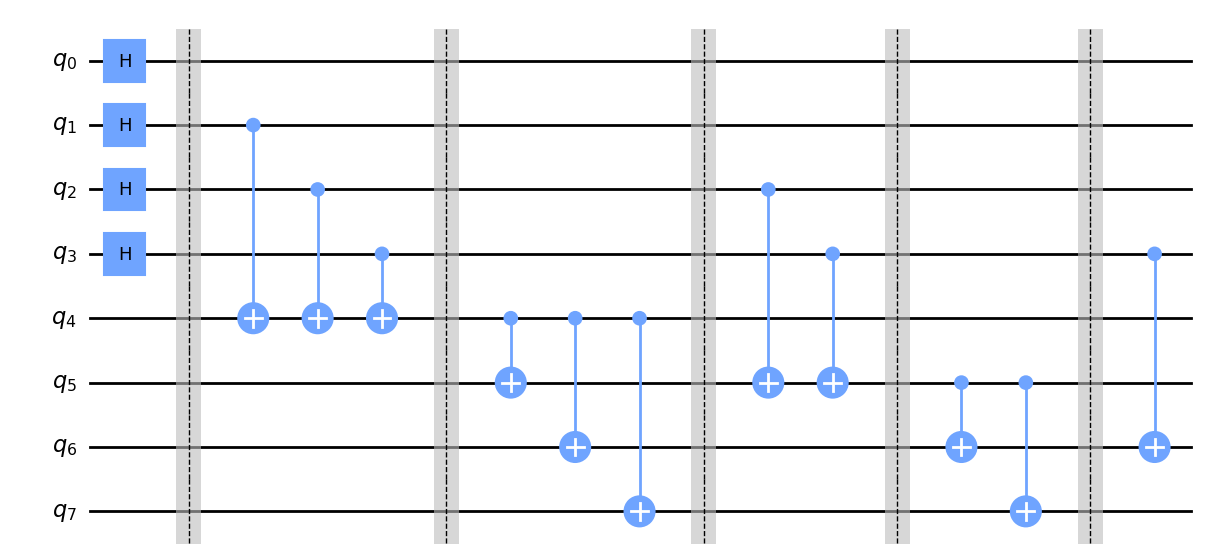

In [22]:
circ.cx(3,6)

circ.draw('mpl',style='clifford')

In [23]:
circ.barrier()

In [24]:
# prise de décision de la dernière valeur du qbits

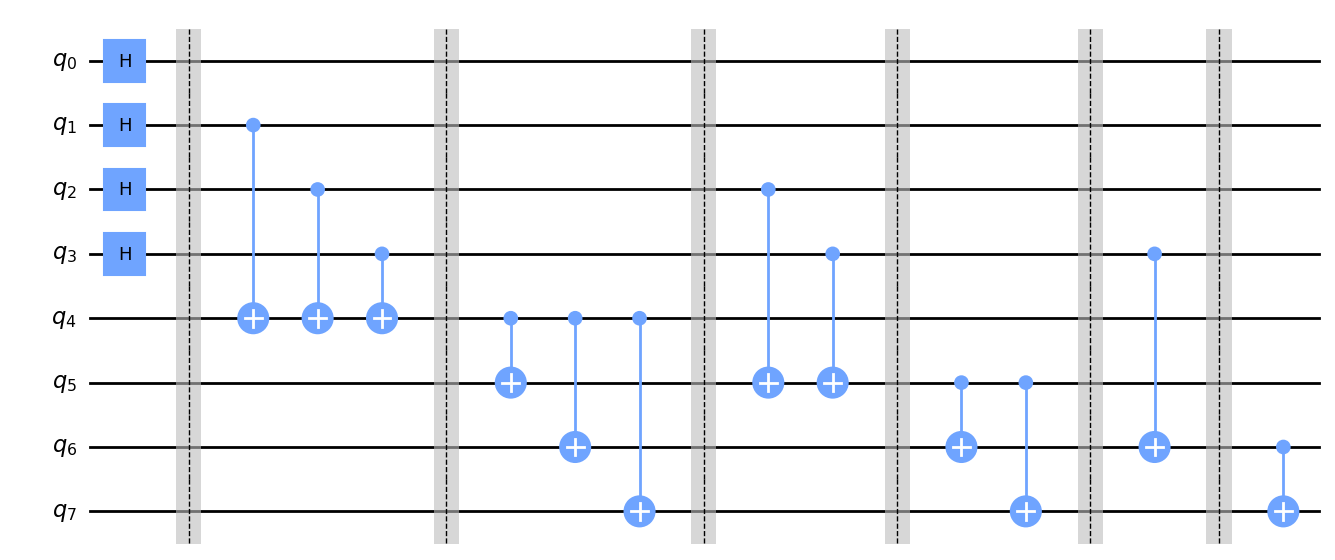

In [25]:
circ.cx(6,7)

circ.draw('mpl',style='clifford')

In [26]:
circ.barrier()

In [27]:
#mesure de tous les qbits

In [28]:
meas = QuantumCircuit(8)
meas.measure_all()

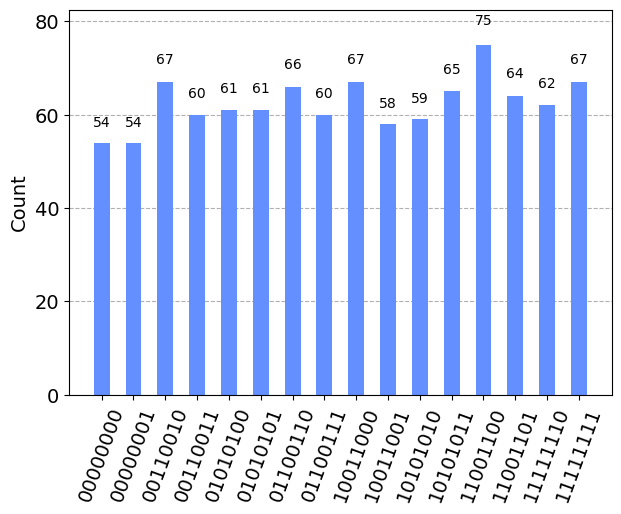

In [34]:
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
circ = circ.compose(meas)
result = backend.run(transpile(circ, backend), shots=1000).result()
counts  = result.get_counts(circ)
plot_histogram(counts)